## Avishkar Dinesh Chothwe
# Roll no: 282029
# PRN no: 22310789
# Assignment No: 6 - Regression technique

Q . Assignment on Regression technique. Download temperature data from below

link.
https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.
csv This data consists of temperatures of INDIA averaging the temperatures
of all places month wise. Temperatures values are recorded in CELSIUS                 
a) Apply Linear Regression using suitable library function and predict the
Month-wise temperature.                
b) Assess the performance of regression models using MSE, MAE and R-Square
metrics           
c) Visualize simple regression model.         

a) Apply Linear Regression using suitable library function and predict the Month- wise temperature

In [1]:
# load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#load the dataset
df = pd.read_csv('temperatures.csv')

In [3]:
# List of months
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

In [4]:
# Independent variable (reshape to 2D)
X = df[['YEAR']]

In [6]:
# Create a dictionary to store performance metrics
performance_metrics = {}
plt.figure(figsize=(18, 16))
plt.suptitle("Month-wise Temperature Trends and Linear Regression Predictions", fontsize=16)

Text(0.5, 0.98, 'Month-wise Temperature Trends and Linear Regression Predictions')

<Figure size 1800x1600 with 0 Axes>

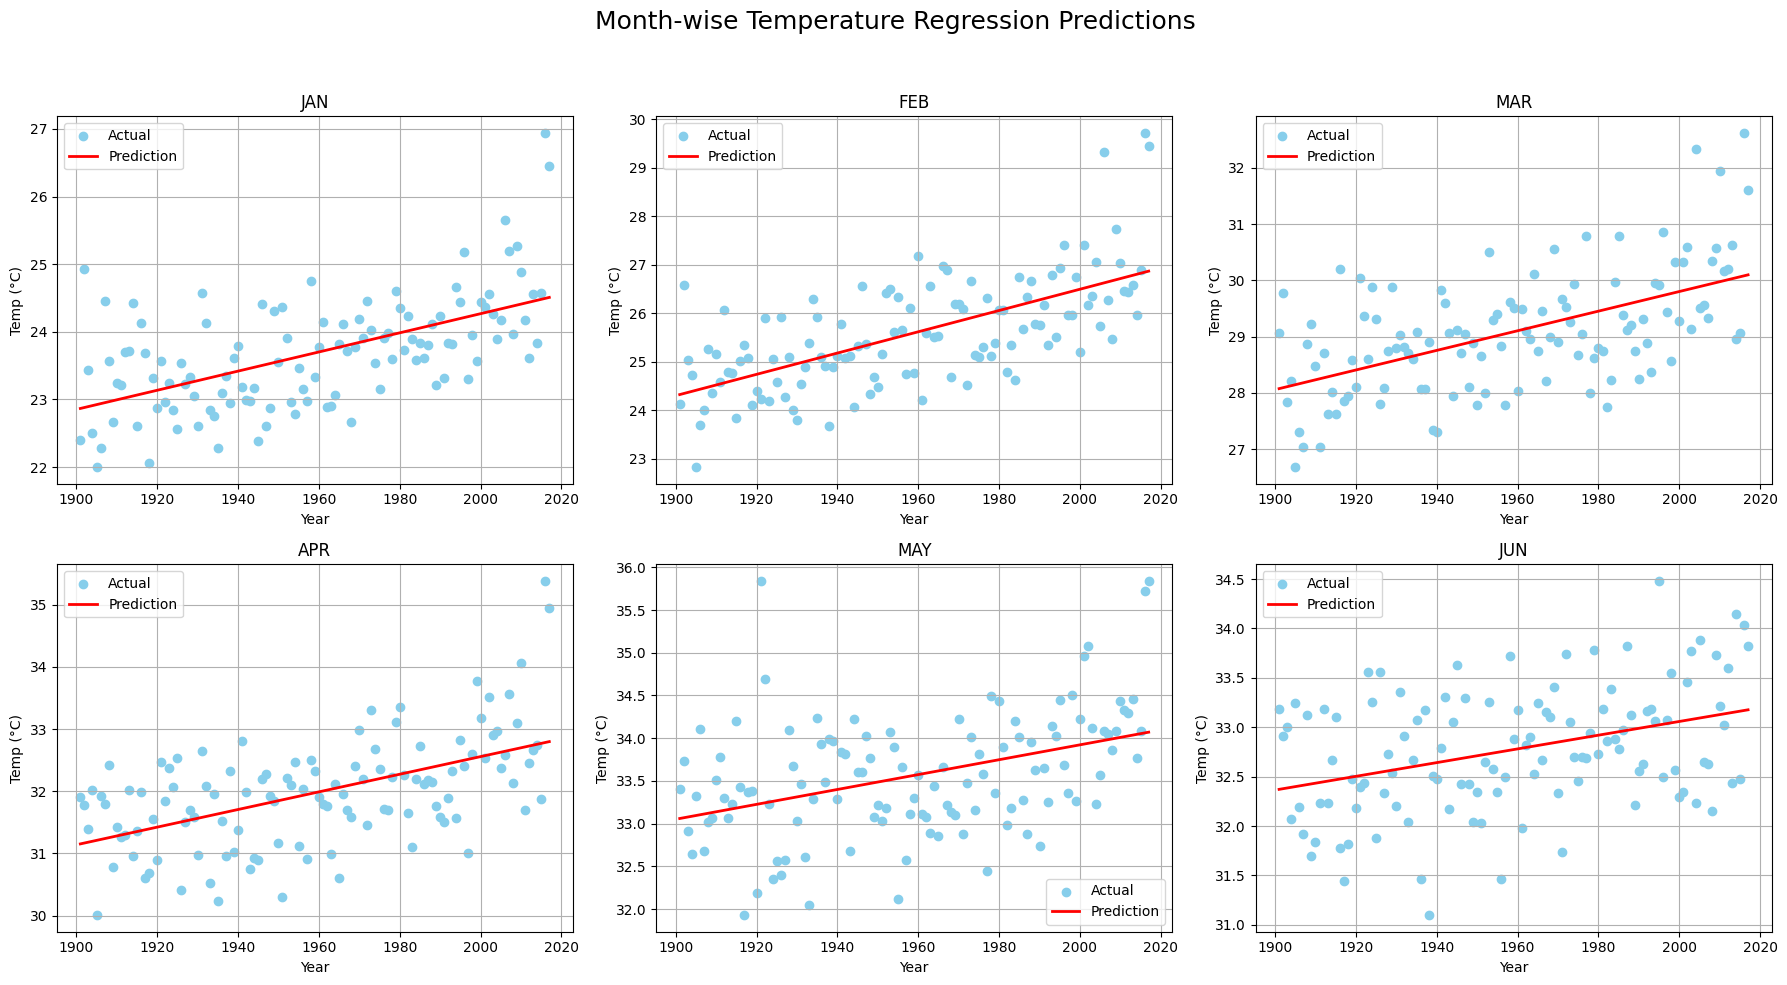

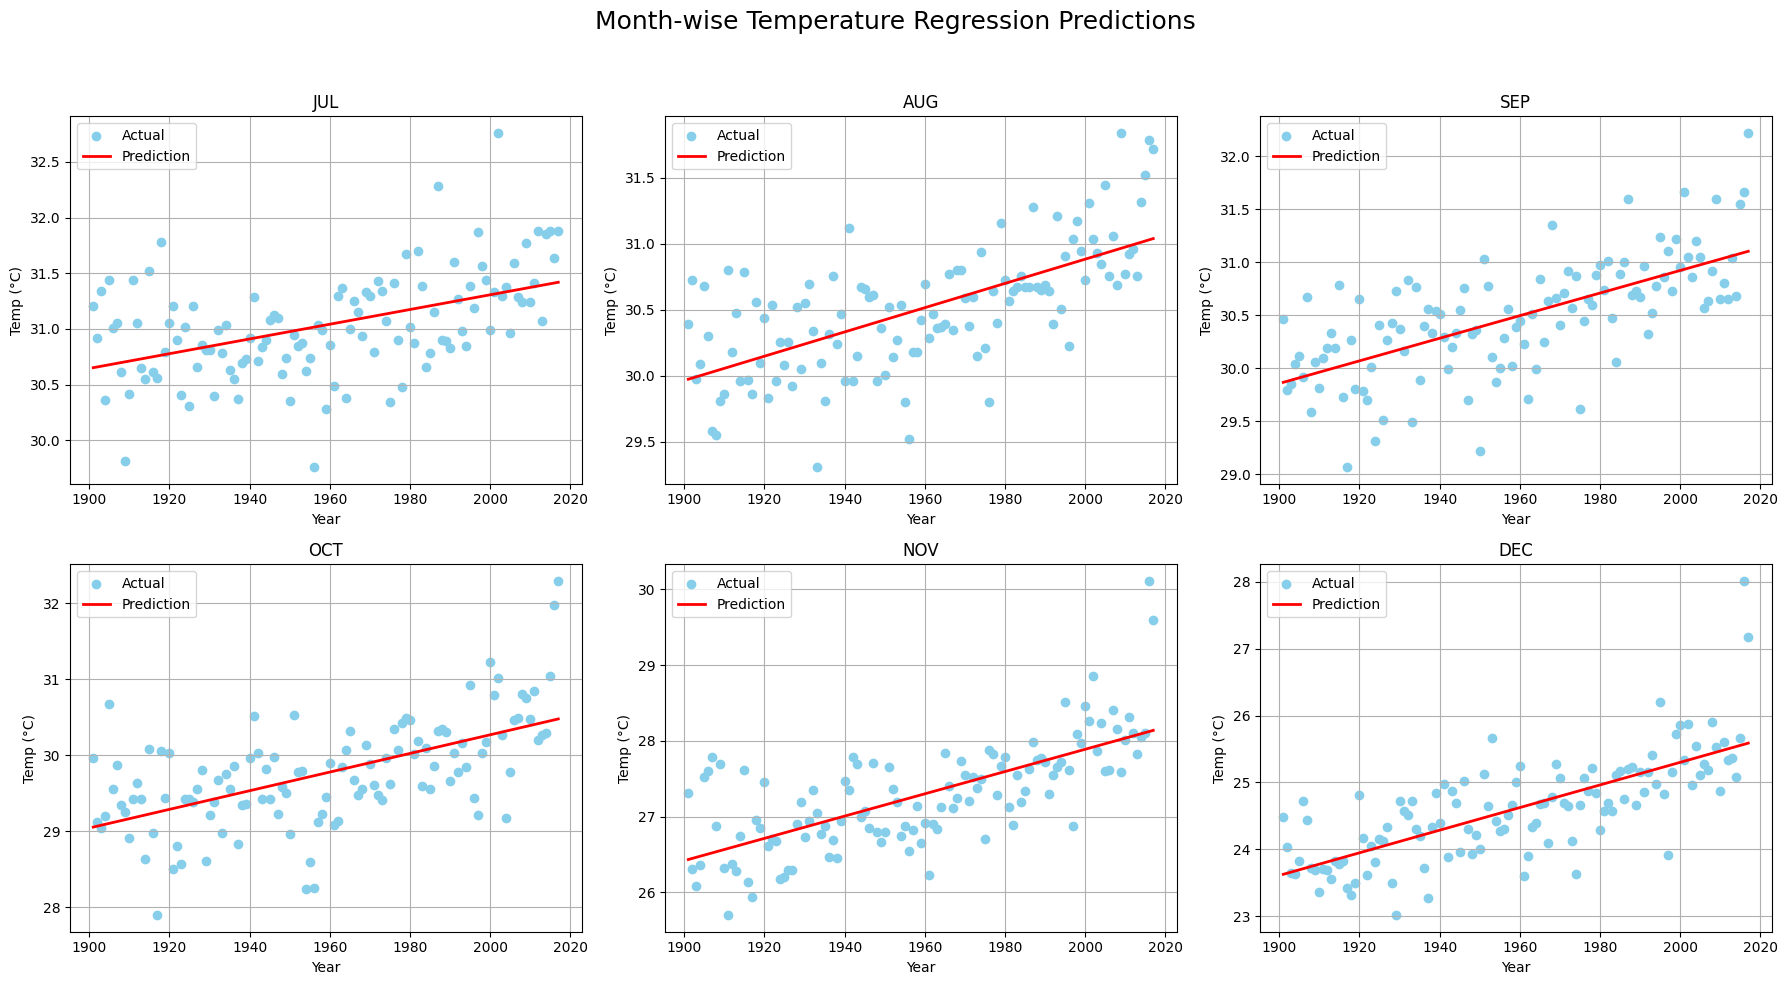

In [8]:
for batch in range(0, len(months), 6):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("Month-wise Temperature Regression Predictions", fontsize=18)

    for i, month in enumerate(months[batch:batch + 6]):
        row, col = divmod(i, 3)
        ax = axes[row][col]

        y = df[month]
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        ax.scatter(X, y, color='skyblue', label='Actual')
        ax.plot(X, y_pred, color='red', linewidth=2, label='Prediction')
        ax.set_title(month)
        ax.set_xlabel('Year')
        ax.set_ylabel('Temp (°C)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


 b) Assess the performance of regression models using MSE, MAE and R-Square metrics

In [11]:
# Loop through each month
for month in months:
    y = df[month]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    performance_metrics[month] = {
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'R-Square (R²)': r2
    }

# Create DataFrame
metrics_df = pd.DataFrame(performance_metrics).T
metrics_df = metrics_df.round(4)
metrics_df.index.name = 'Month'
metrics_df.reset_index(inplace=True)

# Display formatted table
print("=== Regression Model Performance Metrics ===\n")
print(metrics_df.to_string(index=False))


=== Regression Model Performance Metrics ===

Month  Mean Squared Error (MSE)  Mean Absolute Error (MAE)  R-Square (R²)
  JAN                    0.4619                     0.5270         0.3312
  FEB                    0.7632                     0.6790         0.4187
  MAR                    0.7846                     0.7144         0.3068
  APR                    0.5551                     0.5848         0.2923
  MAY                    0.4344                     0.5100         0.1662
  JUN                    0.3425                     0.4817         0.1383
  JUL                    0.1680                     0.3148         0.2290
  AUG                    0.1287                     0.2822         0.4279
  SEP                    0.1642                     0.3117         0.4409
  OCT                    0.3222                     0.4277         0.3470
  NOV                    0.2596                     0.3803         0.4870
  DEC                    0.2817                     0.3809        

c) Visualize regression model

In [12]:
# Extract data for January
X = df[['YEAR']]
y_jan = df['JAN']

In [13]:
# Fit linear regression model
model_jan = LinearRegression()
model_jan.fit(X, y_jan)
y_pred_jan = model_jan.predict(X)

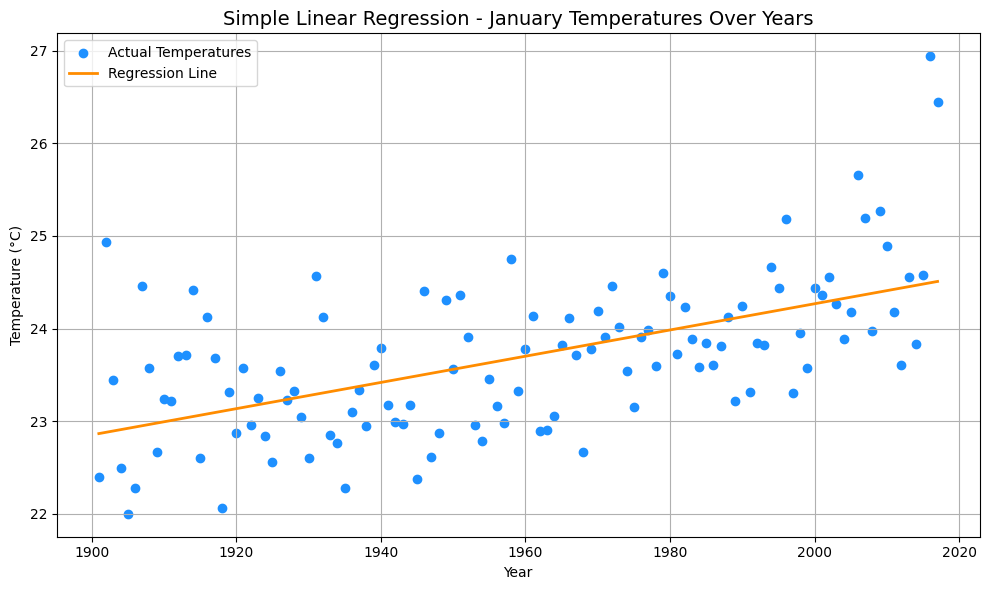

In [14]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y_jan, color='dodgerblue', label='Actual Temperatures')
plt.plot(X, y_pred_jan, color='darkorange', linewidth=2, label='Regression Line')
plt.title("Simple Linear Regression - January Temperatures Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()